# 삼성전자 주가 예측 따라하기

0. 야후 파이낸스 데이터 불러오기

In [ ]:
!pip install yfinance

     |████████████████████████████████| 6.4 MB 51.2 MB/s 
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [ ]:
# 종가를 가져와 price라고 지정해주고 분석
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

samsung_df = yf.download('005930.KS',
                         start='2020-01-01',
                         end='2021-04-20',
                         progress=False)

samsung_df = samsung_df[["Close"]]

samsung_df = samsung_df.reset_index()

samsung_df.columns = ['day', 'price']

samsung_df['day'] = pd.to_datetime(samsung_df['day'])

samsung_df.index = samsung_df['day']
samsung_df.set_index('day', inplace=True)

samsung_df

,price
day,
2020-01-02,55200.0
2020-01-03,55500.0
2020-01-06,55500.0
2020-01-07,55800.0
2020-01-08,56800.0
...,...
2021-04-14,84000.0
2021-04-15,84100.0
2021-04-16,83900.0


1. 탐색

In [ ]:
# 마지막 날짜 5일을 제외한 나머지 Train으로 지정
samsung_train_df = samsung_df[:317]
samsung_train_df

,price
day,
2020-01-02,55200.0
2020-01-03,55500.0
2020-01-06,55500.0
2020-01-07,55800.0
2020-01-08,56800.0
...,...
2021-04-07,85600.0
2021-04-08,84700.0
2021-04-09,83600.0


In [ ]:
samsung_test_df = samsung_df[317:]
samsung_test_df

,price
day,
2021-04-14,84000.0
2021-04-15,84100.0
2021-04-16,83900.0
2021-04-19,83300.0
2021-04-20,83900.0


시각화

In [ ]:
import platform
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

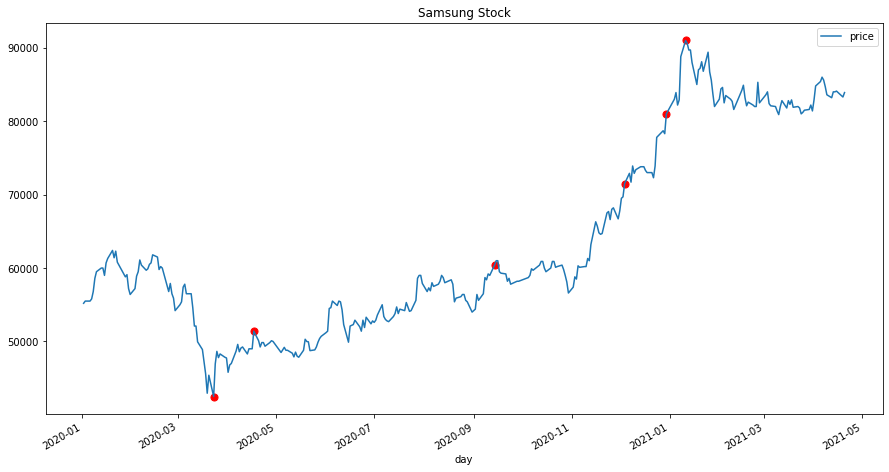

In [ ]:
fig, ax = plt.subplots(figsize=(15, 8))
samsung_df.plot(ax=ax)
y1 = ['2020-03-23','2020-04-17' ,'2020-09-14','2020-12-04','2020-12-30','2021-01-11'] 
y2 = [42500,51400,60400,71500,81000,91000]

plt.scatter(y1,y2,s=50,color='r')

plt.title("Samsung Stock")
plt.show()

2. 예측

Model 1: ARIMA

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

model = ARIMA(samsung_train_df.price.values, order=(2,1,2))
model_fit = model.fit(trend='c', full_output = True, disp=True)
print(model_fit.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  316
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -2694.895
Method:                       css-mle   S.D. of innovations           1217.716
Date:                Wed, 29 Dec 2021   AIC                           5401.790
Time:                        04:15:58   BIC                           5424.325
Sample:                             1   HQIC                          5410.792
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         91.0412     69.663      1.307      0.192     -45.496     227.579
ar.L1.D.y      1.2546      0.012    103.401      0.000       1.231       1.278
ar.L2.D.y     -0.9947      0.007   -150.500      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:1441: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(-inv(hess)))


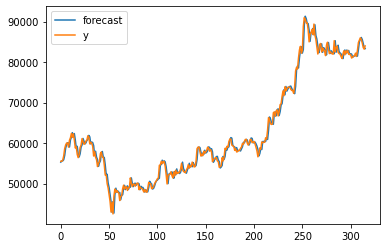

In [ ]:
# 학습 데이터에 대한 예측 결과
fig = model_fit.plot_predict()

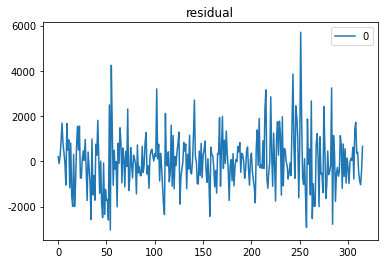

In [ ]:
residuals = pd.DataFrame(model_fit.resid)
residuals.plot(title="residual")

In [ ]:
model2 = ARIMA(samsung_train_df.price.values, order=(2,2,2))
model2_fit = model2.fit(trend='c', full_output = True, disp=True)
print(model2_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                   D2.y   No. Observations:                  315
Model:                 ARIMA(2, 2, 2)   Log Likelihood               -2690.587
Method:                       css-mle   S.D. of innovations           1228.523
Date:                Wed, 29 Dec 2021   AIC                           5393.175
Time:                        04:16:13   BIC                           5415.690
Sample:                             2   HQIC                          5402.170
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7960      0.782      1.019      0.309      -0.736       2.328
ar.L1.D2.y    -0.4876      0.727     -0.670      0.503      -1.913       0.938
ar.L2.D2.y     0.0333      0.056      0.590      0.5

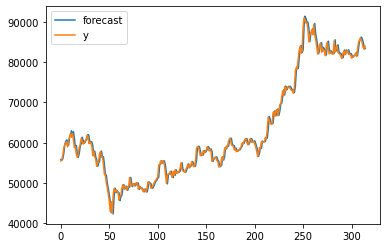

In [ ]:
fig = model2_fit.plot_predict()

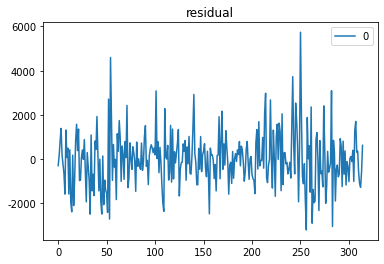

In [ ]:
residuals2 = pd.DataFrame(model2_fit.resid)
residuals2.plot(title="residual")

예측

In [ ]:
forecast_data = model_fit.forecast(steps=5)

In [ ]:
pred_arima_y = forecast_data[0].tolist()

test_y = samsung_test_df.price.values

pred_y_lower = []
pred_y_upper = []

for lower_upper in forecast_data[2]:
    lower = lower_upper[0]
    upper = lower_upper[1]
    pred_y_lower.append(lower)
    pred_y_upper.append(upper)

In [ ]:
forecast_data

(array([84238.73731436, 84469.02327957, 84587.85070505, 84575.24665204,
        84508.61367665]),
 array([1217.71646875, 1728.28835858, 2129.34373438, 2472.67524101,
        2773.46766002]),
 array([[81852.05689223, 86625.4177365 ],
        [81081.64034185, 87856.40621729],
        [80414.41367497, 88761.28773513],
        [79728.89223419, 89421.60106989],
        [79072.71695073, 89944.51040257]]))

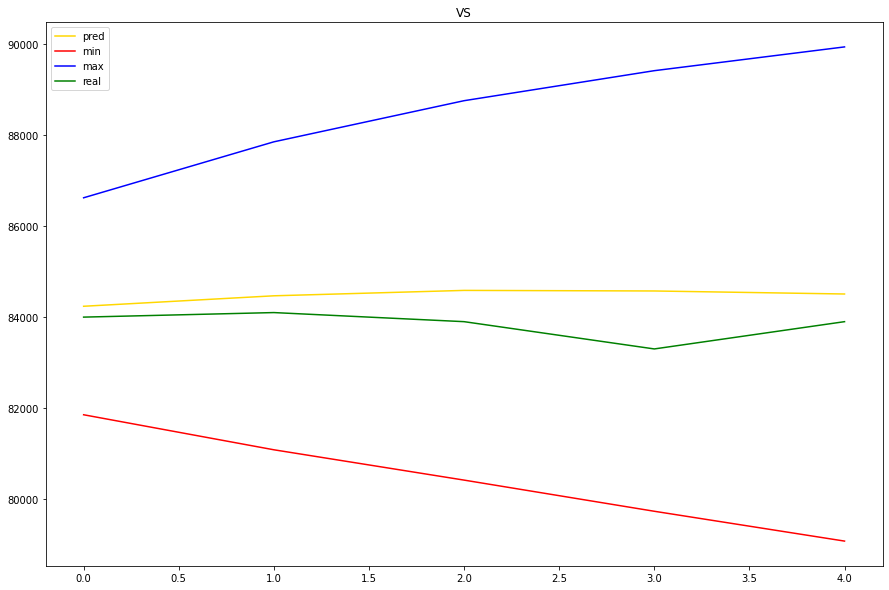

In [ ]:
plt.figure(figsize=(15, 10))

# 모델이 예측한 가격 그래프
plt.plot(pred_arima_y, color='gold')
# 모델이 예측한 최저 가격 그래프
plt.plot(pred_y_lower, color='red')
# 모델이 예측한 최고 가격 그래프
plt.plot(pred_y_upper, color='blue')
# 실제 가격 그래프
plt.plot(test_y, color='green')

plt.legend(['pred', 'min', 'max', 'real'])
plt.title('VS')
plt.show()

2. Facebook Prophet

In [ ]:
from fbprophet import Prophet

samsung_df = samsung_df.reset_index()

samsung_df.columns = ['ds','y']

samsung_train_df = samsung_df[:317]
samsung_test_df = samsung_df[317:]

In [ ]:
prophet = Prophet(seasonality_mode = 'multiplicative',
                  yearly_seasonality=True,
                  weekly_seasonality=True,
                  daily_seasonality=True,
                  changepoint_prior_scale=0.5)

prophet.fit(samsung_train_df)

In [ ]:
future_data = prophet.make_future_dataframe(periods=5, freq='d')
forecast_data = prophet.predict(future_data)
forecast_data[['ds','yhat','yhat_lower','yhat_upper']].tail(5)

,ds,yhat,yhat_lower,yhat_upper
317,2021-04-14,84697.939052,83067.581841,86393.487477
318,2021-04-15,84406.375516,82675.422689,86130.747744
319,2021-04-16,84057.882277,82393.001600,85663.580337
320,2021-04-17,75340.001930,73677.096637,77052.733466
321,2021-04-18,74964.027647,73301.423524,76821.799634


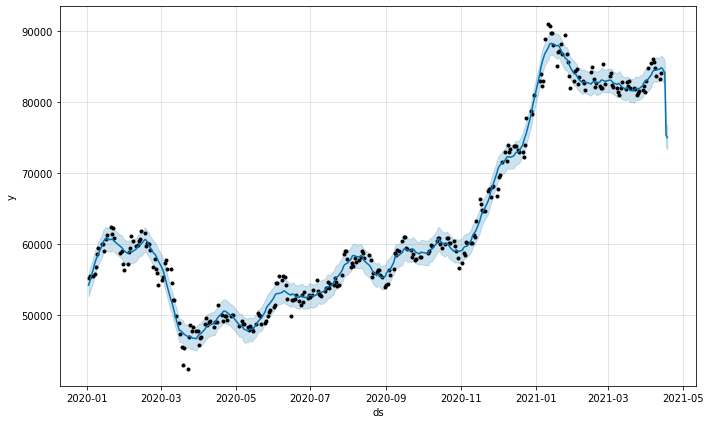

In [ ]:
fig1 = prophet.plot(forecast_data)

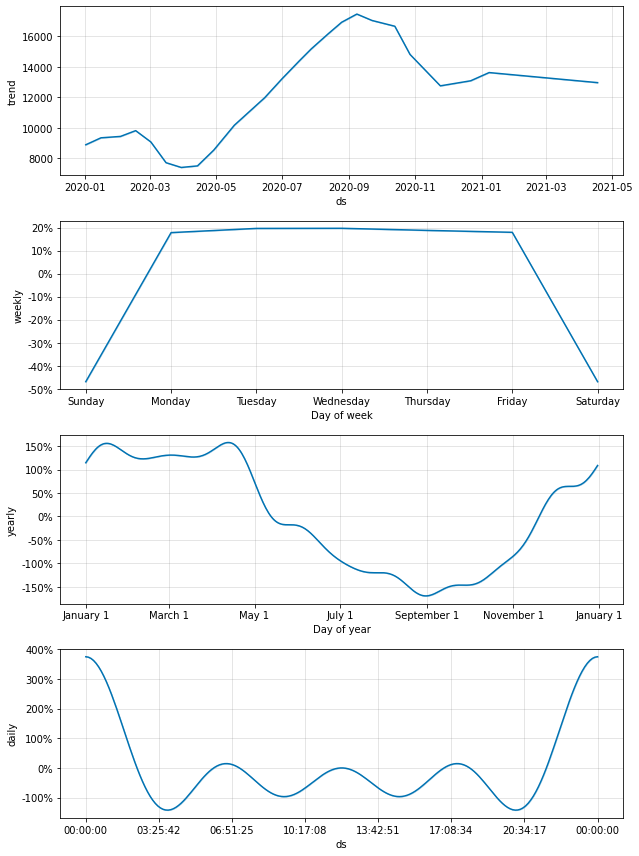

In [ ]:
fig2 = prophet.plot_components(forecast_data)

Testset 평가

In [ ]:
plt.figure(figsize=(15, 10))

pred_fbprophet_y = forecast_data.yhat.values[-5:]
test_y = samsung_test_df.values
pred_y_lower = forecast_data.yhat_lower.values[-5:]
pred_y_upper = forecast_data.yhat_upper.values[-5:]

plt.plot(pred_fbprophet_y, color='gold')
plt.plot(pred_y_lower, color='red')
plt.plot(pred_y_upper, color='blue')
plt.plot(test_y, color='green')

plt.legend(['pred', 'min', 'max', 'real'])
plt.title('VS')

Text(0.5, 1.0, 'VS')

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7f9f8bd825f0> (for post_execute):


ValueError: ignored

ValueError: ignored

array([54227.51256816, 54763.42394522, 56525.08074797, 57246.38200024,
       57783.79765332, 58205.48402499, 58602.08245474, 59798.11063884,
       60295.16550807, 60590.72614163, 60758.94237925, 60718.63182757,
       60622.39785049, 60708.71325216, 60606.78876077, 60395.64494197,
       59692.43967775, 59535.15900838, 59293.0089385 , 59066.05651816,
       58680.747124  , 58894.57909543, 58957.52347385, 58945.52150837,
       58956.87839296, 59316.06085293, 59646.79107526, 59821.30541892,
       59915.21476372, 60027.13182961, 60646.38007757, 60552.67504037,
       60287.99985247, 59931.44742326, 59582.48011659, 58749.82438436,
       58638.78223058, 58354.9362619 , 57975.3542979 , 57596.67355056,
       56638.13640085, 56196.94557903, 55588.44122586, 54889.13186898,
       54192.40025924, 52286.44093835, 51801.06122348, 51166.53766606,
       50454.57733595, 49752.11136043, 47861.3291206 , 47849.59898747,
       47709.06490978, 47503.79288754, 47314.48160877, 46996.97876574,
      